<a href="https://colab.research.google.com/github/Antika20/Sumbssion-Pengembang-Machine-Learning/blob/main/Submission_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link Dataset 
https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021

https://www.kaggle.com/discussions/getting-started/316278

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"antikaorinda","key":"4eff175b8f61192de087d150bebd4735"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [28]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d meetnagadia/apple-stock-price-from-19802021

apple-stock-price-from-19802021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
from zipfile import ZipFile
file_name = "/content/apple-stock-price-from-19802021.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [30]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [39]:
data_train = pd.read_csv('/content/AAPL.csv')
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [32]:
data_train.isnull().sum()

Date,Open,High,Low,Close,Adj Close,Volume    0
dtype: int64

In [33]:
data_train.isnull()

,"Date,Open,High,Low,Close,Adj Close,Volume"
0,False
1,False
2,False
3,False
4,False
...,...
10463,False
10464,False
10465,False
10466,False


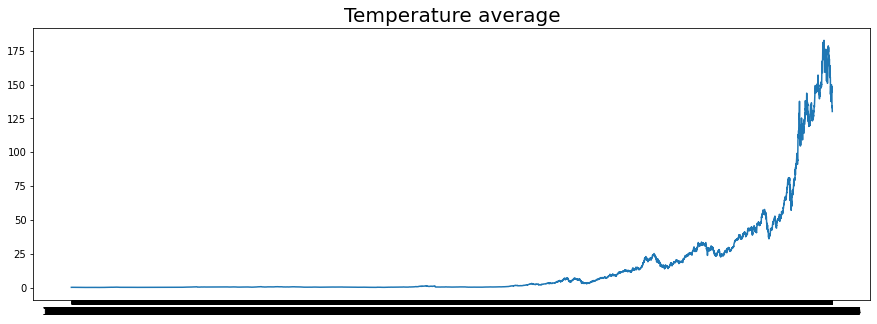

In [40]:
dates = data_train['Date'].values
category  = data_train['Open'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, category)
plt.title('Temperature average',
          fontsize=20);

In [41]:
dates = data_train['Date'].values
category  = data_train['Open'].values

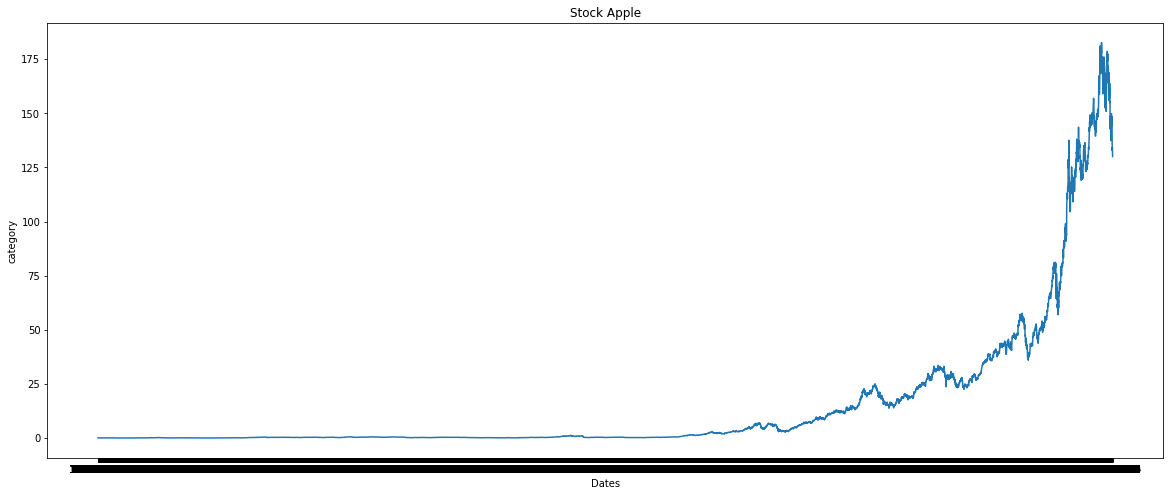

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(dates, category)
plt.title('Stock Apple')
plt.xlabel('Dates')
plt.ylabel('category')
plt.show()

In [43]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(category, dates, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

8374 2094


In [50]:
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
test_set = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

In [51]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [52]:
history = model.fit(train_set,epochs=100,validation_data=test_set)

Epoch 1/100
84/84 [==============================] - 11s 92ms/step - loss: 19.6192 - mae: 20.1155 - val_loss: 71.1390 - val_mae: 71.6390
Epoch 2/100
84/84 [==============================] - 7s 78ms/step - loss: 16.0703 - mae: 16.5625 - val_loss: 60.6360 - val_mae: 61.1360
Epoch 3/100
84/84 [==============================] - 7s 77ms/step - loss: 4.4081 - mae: 4.9008 - val_loss: 52.8372 - val_mae: 53.3372
Epoch 4/100
84/84 [==============================] - 7s 79ms/step - loss: 7.6754 - mae: 8.1726 - val_loss: 53.0880 - val_mae: 53.5880
Epoch 5/100
84/84 [==============================] - 7s 84ms/step - loss: 13.2390 - mae: 13.7354 - val_loss: 57.2633 - val_mae: 57.7633
Epoch 6/100
84/84 [==============================] - 8s 96ms/step - loss: 11.4416 - mae: 11.9267 - val_loss: 55.5805 - val_mae: 56.0805
Epoch 7/100
84/84 [==============================] - 7s 78ms/step - loss: 16.4988 - mae: 16.9952 - val_loss: 43.0061 - val_mae: 43.5052
Epoch 8/100
84/84 [==============================] 

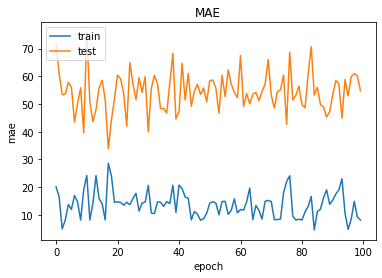

In [53]:
# plot of mae
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

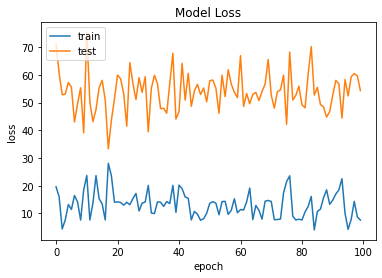

In [54]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()